In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv("data/Countries_exercise.csv")
data

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450
...,...,...,...
236,Samoa,-172.164851,-13.753243
237,Yemen,47.586762,15.909280
238,South Africa,25.083901,-29.000341
239,Zambia,27.774759,-13.458242


In [3]:
x = data.drop("name",axis=1)
x

,Longitude,Latitude
0,-69.982677,12.520880
1,66.004734,33.835231
2,17.537368,-12.293361
3,-63.064989,18.223959
4,20.049834,41.142450
...,...,...
236,-172.164851,-13.753243
237,47.586762,15.909280
238,25.083901,-29.000341
239,27.774759,-13.458242


Text(0, 0.5, 'Latitude')

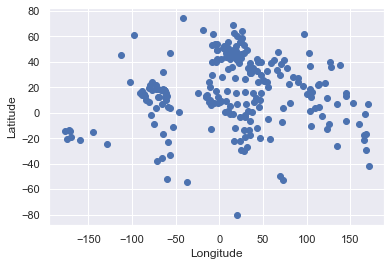

In [9]:
plt.scatter(data["Longitude"],data["Latitude"])
plt.xlabel("Longitude")
plt.ylabel("Latitude")

In [4]:
wcss=[]
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
wcss

[1413859.6798344278,
 657012.0797586322,
 325235.522370559,
 256595.2235602979,
 192212.48189497035,
 152910.46887675117]

Text(0, 0.5, 'Within-cluster Sum of Squares')

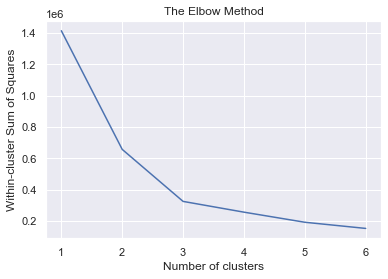

In [5]:
number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

In [10]:
kmeans = KMeans(3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [12]:
data["Clusters"] = kmeans.predict(x)
data

,name,Longitude,Latitude,Clusters
0,Aruba,-69.982677,12.520880,1
1,Afghanistan,66.004734,33.835231,2
2,Angola,17.537368,-12.293361,2
3,Anguilla,-63.064989,18.223959,1
4,Albania,20.049834,41.142450,2
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,1
237,Yemen,47.586762,15.909280,2
238,South Africa,25.083901,-29.000341,2
239,Zambia,27.774759,-13.458242,2


Text(0, 0.5, 'Latitude')

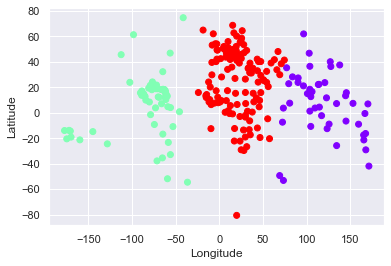

In [13]:
plt.scatter(data["Longitude"],data["Latitude"],c=data["Clusters"],cmap="rainbow")
plt.xlabel("Longitude")
plt.ylabel("Latitude")